In [115]:
import pandas as pd
# df = pd.read_csv('Consumer_Complaints.csv')
df1 = pd.read_csv('complaints.csv')
df1.head()

C:\Users\k142\AppData\Local\Temp\ipykernel_22920\306174597.py:3: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv('complaints.csv')


,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2012-12-20,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,"Seterus, Inc.",CA,94605,NaN,NaN,Referral,2012-12-26,Closed with explanation,Yes,No,214201
1,2024-03-18,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,NaN,NaN,"EQUIFAX, INC.",CA,95824,NaN,NaN,Web,2024-03-18,In progress,Yes,NaN,8571283
2,2024-03-08,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,NaN,NaN,"EQUIFAX, INC.",GA,30319,NaN,NaN,Web,2024-03-08,In progress,Yes,NaN,8497845
3,2024-02-08,Checking or savings account,Checking account,Closing an account,Company closed your account,Wells Fargo complaint # XXXX XXXX regarding my...,Company has responded to the consumer and the ...,WELLS FARGO & COMPANY,CA,926XX,NaN,Consent provided,Web,2024-02-08,Closed with explanation,Yes,NaN,8309379
4,2024-03-08,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,NaN,NaN,"EQUIFAX, INC.",FL,32707,NaN,NaN,Web,2024-03-08,In progress,Yes,NaN,8497336


In [116]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4891981 entries, 0 to 4891980
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 671.

In [117]:
df1['date_time'] = pd.to_datetime(df1['Date received'])

In [119]:
df1=df1[pd.notnull(df1['Consumer complaint narrative'])]

In [133]:
df = df1[df1['date_time'] < '2015-05-01']

In [134]:
df.to_csv('complains_orig.csv')

In [143]:
df=pd.read_csv('complains_orig.csv')

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7756 entries, 0 to 7755
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Unnamed: 0                    7756 non-null   int64 
 1   Date received                 7756 non-null   object
 2   Product                       7756 non-null   object
 3   Sub-product                   5566 non-null   object
 4   Issue                         7756 non-null   object
 5   Sub-issue                     3913 non-null   object
 6   Consumer complaint narrative  7756 non-null   object
 7   Company public response       2844 non-null   object
 8   Company                       7756 non-null   object
 9   State                         7732 non-null   object
 10  ZIP code                      7756 non-null   object
 11  Tags                          1342 non-null   object
 12  Consumer consent provided?    7756 non-null   object
 13  Submitted via     

In [145]:
df = df[['Product', 'Consumer complaint narrative']]
df.columns = ['Product', 'Consumer_complaint_narrative']

In [146]:
df['category_id'] = df['Product'].factorize()[0]
from io import StringIO
category_id_df = df[['Product', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'Product']].values)

In [147]:
df

,Product,Consumer_complaint_narrative,category_id
0,Mortgage,Previous filed complaint # XXXX. Company respo...,0
1,Mortgage,We presented a complaint on XXXX XXXX here at ...,0
2,Mortgage,Nation Star Mortgage payment electronically de...,0
3,Mortgage,I have been in the Modification process since ...,0
4,Mortgage,Here is a copy of the letter I submitted to ou...,0
...,...,...,...
7751,Debt collection,Spoke to company to have letter sent on terms ...,1
7752,Student loan,Amid growing criticism from regulatory agencie...,6
7753,Debt collection,Call from ( XXXX ) XXXX Diversified Adjustment...,1
7754,Credit card,I over paid my Chase credit card via bill pay ...,2


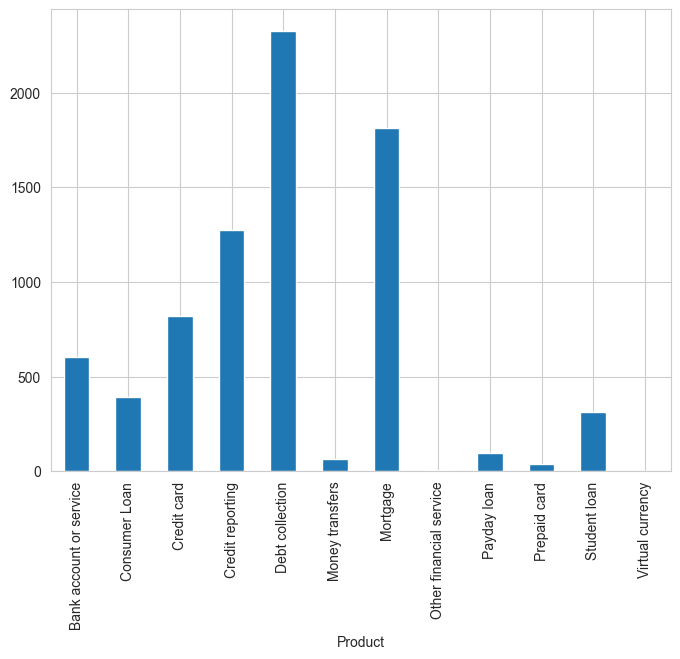

In [148]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('Product').Consumer_complaint_narrative.count().plot.bar(ylim=0)
plt.show()

In [149]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

features = tfidf.fit_transform(df.Consumer_complaint_narrative).toarray()
labels = df.category_id
features.shape

(7756, 21606)

In [150]:
from sklearn.feature_selection import chi2
import numpy as np

N = 2
for Product, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names_out())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Product))
  print("  . Most correlated unigrams:\n       . {}".format('\n       . '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n       . {}".format('\n       . '.join(bigrams[-N:])))

# 'Bank account or service':
  . Most correlated unigrams:
       . branch
       . overdraft
  . Most correlated bigrams:
       . overdraft fees
       . checking account
# 'Consumer Loan':
  . Most correlated unigrams:
       . car
       . vehicle
  . Most correlated bigrams:
       . santander consumer
       . xxxx vehicle
# 'Credit card':
  . Most correlated unigrams:
       . capital
       . card
  . Most correlated bigrams:
       . annual fee
       . credit card
# 'Credit reporting':
  . Most correlated unigrams:
       . experian
       . equifax
  . Most correlated bigrams:
       . report xxxx
       . credit report
# 'Debt collection':
  . Most correlated unigrams:
       . collection
       . debt
  . Most correlated bigrams:
       . collect debt
       . collection agency
# 'Money transfers':
  . Most correlated unigrams:
       . gram
       . paypal
  . Most correlated bigrams:
       . money transfer
       . western union
# 'Mortgage':
  . Most correlated unigram

In [151]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(df['Consumer_complaint_narrative'], df['Product'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [152]:
print(clf.predict(count_vect.transform(["This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."])))

['Debt collection']


In [153]:
print(clf.predict(count_vect.transform(["I am disputing the inaccurate information the Chex-Systems has on my credit report. I initially submitted a police report on XXXX/XXXX/16 and Chex Systems only deleted the items that I mentioned in the letter and not all the items that were actually listed on the police report. In other words they wanted me to say word for word to them what items were fraudulent. The total disregard of the police report and what accounts that it states that are fraudulent. If they just had paid a little closer attention to the police report I would not been in this position now and they would n't have to research once again. I would like the reported information to be removed : XXXX XXXX XXXX"])))

['Debt collection']


In [91]:
df[df['Consumer_complaint_narrative'] == "This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."]

,Product,Consumer_complaint_narrative,category_id


In [92]:
df[df['Consumer_complaint_narrative'] == "I am disputing the inaccurate information the Chex-Systems has on my credit report. I initially submitted a police report on XXXX/XXXX/16 and Chex Systems only deleted the items that I mentioned in the letter and not all the items that were actually listed on the police report. In other words they wanted me to say word for word to them what items were fraudulent. The total disregard of the police report and what accounts that it states that are fraudulent. If they just had paid a little closer attention to the police report I would not been in this position now and they would n't have to research once again. I would like the reported information to be removed : XXXX XXXX XXXX"]

,Product,Consumer_complaint_narrative,category_id


In [93]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score


models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

C:\prj\ods\nlp_huawei_new2_task\venv\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\prj\ods\nlp_huawei_new2_task\venv\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
C:\prj\ods\nlp_huawei_new2_task\venv\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\prj\ods\nlp_huawei_new2_task\venv\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\prj\ods\nlp_huawei_new2_task\venv\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarni

In [94]:
cv_df

,model_name,fold_idx,accuracy
0,RandomForestClassifier,0,0.441366
1,RandomForestClassifier,1,0.460348
2,RandomForestClassifier,2,0.443585
3,RandomForestClassifier,3,0.442295
4,RandomForestClassifier,4,0.453901
5,LinearSVC,0,0.847938
6,LinearSVC,1,0.852353
7,LinearSVC,2,0.854288
8,LinearSVC,3,0.849774
9,LinearSVC,4,0.850419


C:\Users\k142\AppData\Local\Temp\ipykernel_22920\2410705282.py:4: FutureWarning: Use "auto" to set automatic grayscale colors. From v0.14.0, "gray" will default to matplotlib's definition.
  sns.stripplot(x='model_name', y='accuracy', data=cv_df,


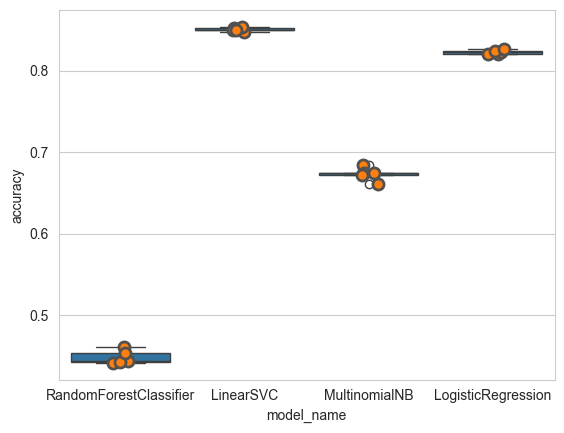

In [95]:
import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [96]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.850954
LogisticRegression        0.822976
MultinomialNB             0.673287
RandomForestClassifier    0.448299
Name: accuracy, dtype: float64

In [97]:
from sklearn.model_selection import train_test_split

model = LinearSVC()

X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

C:\prj\ods\nlp_huawei_new2_task\venv\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


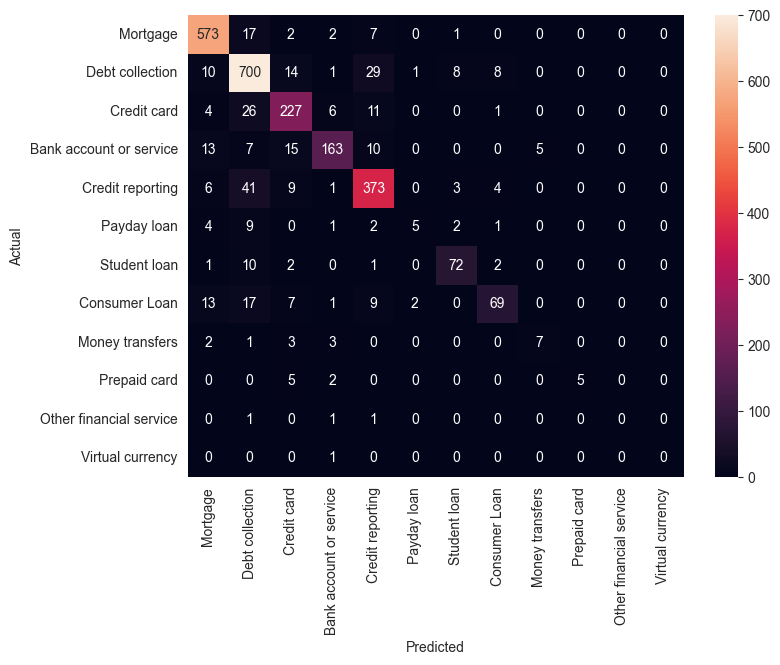

In [98]:
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.Product.values, yticklabels=category_id_df.Product.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [99]:
from IPython.display import display

for predicted in category_id_df.category_id:
  for actual in category_id_df.category_id:
    if predicted != actual and conf_mat[actual, predicted] >= 6:
      print("'{}' predicted as '{}' : {} examples.".format(id_to_category[actual], id_to_category[predicted], conf_mat[actual, predicted]))
      display(df.loc[indices_test[(y_test == actual) & (y_pred == predicted)]][['Product', 'Consumer_complaint_narrative']])
      print('')

'Debt collection' predicted as 'Mortgage' : 10 examples.


,Product,Consumer_complaint_narrative
3600771,Debt collection,Placing a order of validation. Call back withd...
4248390,Debt collection,This is Part XXXX of case number XXXX.SunTrust...
4066975,Debt collection,"I was contacted by phone, with a threat of cri..."
3505678,Debt collection,I contacted the loan servicer of my {$680.00} ...
3475212,Debt collection,1. XXXX is competent to state the matters set ...
4867311,Debt collection,calling my home and job making threat s
825137,Debt collection,"After discharge of a chapter XXXX bankruptcy, ..."
3910076,Debt collection,"I called to pay off a judgment with Cawthorn, ..."
4182419,Debt collection,"Going through a divorce, my ex and I were unab..."
4273943,Debt collection,The option I needed under false statements or ...



'Bank account or service' predicted as 'Mortgage' : 13 examples.


,Product,Consumer_complaint_narrative
4052398,Bank account or service,I walked into a Branch to pay a loan which was...
3737986,Bank account or service,My insurance company XXXX sent me a payment fo...
4089577,Bank account or service,In XXXX of XXXX I made an offer to buy a house...
3942300,Bank account or service,Notarized FHA modification documents XXXX time...
4009928,Bank account or service,"Hello, I am a XXXX agent, I am working on a sh..."
4062234,Bank account or service,Wells Fargo failed to stop debits from XXXX af...
2080397,Bank account or service,I had an insurance claim that was over {$10000...
4105974,Bank account or service,On or around XXXX/XXXX/2015 I realized I owed ...
3777868,Bank account or service,On XX/XX/XXXX I came home from a long day of w...
4219602,Bank account or service,"I bank with Key Bank, and have for many years,..."



'Credit reporting' predicted as 'Mortgage' : 6 examples.


,Product,Consumer_complaint_narrative
3667129,Credit reporting,This is an on going problem. I have been submi...
4052850,Credit reporting,"I received my auto insurance policy renewal, a..."
3743885,Credit reporting,"I wante to pay on mywasher and dryer, i was to..."
1870435,Credit reporting,My fathers location is where my tax form was s...
3911642,Credit reporting,I owned the property which is financed by XXXX...
3663308,Credit reporting,I am writing you this letter to dispute XXXX M...



'Consumer Loan' predicted as 'Mortgage' : 13 examples.


,Product,Consumer_complaint_narrative
3720721,Consumer Loan,Took out a loan with western sky for {$2500.00...
3592742,Consumer Loan,A few years ago I had loss my job and I was un...
3520963,Consumer Loan,Reached out to Avant Credit on XXXX/XXXX/2015 ...
4869765,Consumer Loan,"Since XXXX XXXX, XX/XX/2015, I have unsuccessf..."
4023157,Consumer Loan,"I need some help, back in XX/XX/XXXX a loan th..."
4297029,Consumer Loan,the loan is included in my chapter XXXX the ...
2672787,Consumer Loan,I have an installment loan with high interest ...
4098653,Consumer Loan,Check out XXXXfor detailed descriptions on how...
4212258,Consumer Loan,Nothing specifically happened to me as I have ...
3566104,Consumer Loan,"In XXXX XXXX, I received written notice that t..."



'Mortgage' predicted as 'Debt collection' : 17 examples.


,Product,Consumer_complaint_narrative
3967129,Mortgage,Respa has been looked at for my relocation exp...
3915282,Mortgage,Received letter from Money Network in the mail...
4058023,Mortgage,"On XXXX XXXX, 2014 a complaint ( XXXX ) was op..."
4095169,Mortgage,We have received unsatisfactory service from X...
480221,Mortgage,nation star mortgage ( XXXX ) continues to cal...
3950121,Mortgage,I filed a TILA rescission letter and the alleg...
4869420,Mortgage,XXXX is usurping RESPA Guideline and spending ...
3909674,Mortgage,"I paid Greentree Servicing, LLC XXXX payments ..."
3770824,Mortgage,LAST FRIDAY I WAS CALLED TO DO THE CLOSING OF ...
4080541,Mortgage,"I was notified that a creditor, HSBC, did not ..."



'Credit card' predicted as 'Debt collection' : 26 examples.


,Product,Consumer_complaint_narrative
3965513,Credit card,I was not able to make last month 's payment t...
3654435,Credit card,OneMain Financial called my place of business ...
3643287,Credit card,I am being called by USAA credit card services...
3643977,Credit card,"Opened Capital One Bank account in XXXX, 17 ye..."
3653208,Credit card,I am a victim of ongoing identity theft on or ...
4031090,Credit card,Capital One Bank is having their lawyers sue m...
3570204,Credit card,"I made a legitimate charge, was deceived, and ..."
4129451,Credit card,American Express card company called me at my ...
4227639,Credit card,Eleven years ago I lost my job then had a prob...
4036979,Credit card,NFCU credit card put my account in collections...



'Bank account or service' predicted as 'Debt collection' : 7 examples.


,Product,Consumer_complaint_narrative
4074441,Bank account or service,On XXXX 2014 I file a complaint on a EFT becau...
3470132,Bank account or service,My name is XXXX XXXX and I work at XXXX XXXX X...
3628820,Bank account or service,I tried to open a bank account with Citibank. ...
3837881,Bank account or service,For XXXX and XXXX charges was charged XXXX dol...
4022892,Bank account or service,We finance a bed bought at XXXX in XXXX 2014. ...
3622726,Bank account or service,Fraudulent charges on account are refusing to ...
4345832,Bank account or service,US Bank is attempting to collect an unreasonab...



'Credit reporting' predicted as 'Debt collection' : 41 examples.


,Product,Consumer_complaint_narrative
4211887,Credit reporting,XXXX XXXXPhone Number : XXXXXXXXPhone Call Dat...
823286,Credit reporting,A {$600.00} medical bill for treatment of my w...
4092401,Credit reporting,I stated over the phone that I would assist my...
3765271,Credit reporting,In XX/XX/XXXX my home went into foreclosure. T...
3280618,Credit reporting,Went to a bank to open a account and could n't...
3747624,Credit reporting,I have reported the information to the company...
3762748,Credit reporting,Thanks for your assistance. I was billed for a...
4053126,Credit reporting,I have never applied for credit with this comp...
3498669,Credit reporting,I had the sate of Washington unemployment say ...
4054988,Credit reporting,I am writing in regards 'default ' judgment ag...



'Payday loan' predicted as 'Debt collection' : 9 examples.


,Product,Consumer_complaint_narrative
4251973,Payday loan,Call cell phone several times with threats I w...
4028312,Payday loan,I just received a call from a company called C...
3793264,Payday loan,A third party collection agency is calling my ...
3794917,Payday loan,I 'm not sure which above complaint to file un...
4044661,Payday loan,I KEEP RECEIVING PHONE CALLS FRON NORTHEAST RE...
4088715,Payday loan,I recently received a statement from a collect...
4248257,Payday loan,I am writing a complaint against Gold Star Fin...
4049722,Payday loan,"I took out a Loan from Cash Central XXXX, Al f..."
3721523,Payday loan,I have ask Ad Astra Recovery Account XXXX on a...



'Student loan' predicted as 'Debt collection' : 10 examples.


,Product,Consumer_complaint_narrative
3962160,Student loan,"I was a guarantor on a loan for my Kids, and I..."
3683002,Student loan,I called and asked Navient to stop robo callin...
4130640,Student loan,Was not contacted 4 years later about some pri...
3172150,Student loan,"On XXXX/XXXX/XXXX, I received a phone call fro..."
826205,Student loan,I have recently had a wage garnishment put in ...
3529676,Student loan,I received a collection on my credit report in...
3741695,Student loan,Being sued as a cosigner for my sons loan to a...
3264339,Student loan,"Back in XXXX, I co-signed a non-federal privat..."
3581353,Student loan,Enterprise Recovery System continues to contac...
3751001,Student loan,A student loan was obtained through XXXX. Mine...



'Consumer Loan' predicted as 'Debt collection' : 17 examples.


,Product,Consumer_complaint_narrative
3969490,Consumer Loan,I have had an account with DriveTime for over ...
3457372,Consumer Loan,They keep calling and calling and calling even...
4133323,Consumer Loan,"Harrassing phone calls, during the times I spe..."
4083734,Consumer Loan,I have XXXX cases with you on the same conflic...
3403953,Consumer Loan,"I called Avant credit today, XXXX/XXXX/15 and ..."
4080742,Consumer Loan,They keep calling me and upsetting me about pa...
804686,Consumer Loan,In XX/XX/2014 I purchased an Solar Air Cond. s...
3850438,Consumer Loan,XX/XX/2015- validation request was sent to CNA...
3602620,Consumer Loan,A company named Coast Professional Inc utilizi...
3438691,Consumer Loan,I got a loan with Avant Credit XXXX {$2500.00}...



'Debt collection' predicted as 'Credit card' : 14 examples.


,Product,Consumer_complaint_narrative
3974948,Debt collection,XXXX initially signed me up before they opened...
4225232,Debt collection,i do not recognize this information this is a ...
3908794,Debt collection,I had a Citibank Credit card that was included...
4024984,Debt collection,This account that i do not recognize was opene...
4095737,Debt collection,I had an Amazon store card. The card was sold ...
4171101,Debt collection,Alleged moneys owed to several credit cards ba...
4045525,Debt collection,I had a XXXX Credit card that was included in ...
4006707,Debt collection,I was told by the creditors customer service r...
3546808,Debt collection,"My bank account was hijacked, my bank for my p..."
4024172,Debt collection,I have a few Chase credit card account 's with...



'Bank account or service' predicted as 'Credit card' : 15 examples.


,Product,Consumer_complaint_narrative
3432783,Bank account or service,"I received a letter from Fifth Third Bank "" Th..."
4172355,Bank account or service,"I have a credit card with Capital One, a gm ca..."
3801770,Bank account or service,In XXXX of XX/XX/2014 I received an offer from...
3702107,Bank account or service,I have not received an Interest Statement for ...
3863825,Bank account or service,I applied with my bank that has repeatedly lie...
3839218,Bank account or service,Customer account coding error by Home depot / ...
2934712,Bank account or service,I expect a script back from the bank covering ...
3999874,Bank account or service,I purchased XXXX at The XXXX XXXX ( online ) u...
3806873,Bank account or service,I have a hard credit inquiry in my XXXX report...
4000064,Bank account or service,"A bank teller, XXXX XXXX, at the SunTrust Bank..."



'Credit reporting' predicted as 'Credit card' : 9 examples.


,Product,Consumer_complaint_narrative
4056228,Credit reporting,To Whom It May Concern : I received an alert b...
3953614,Credit reporting,My credit score is in the low to mid XXXX 's d...
3482040,Credit reporting,I applied for this card specifically for a med...
3995871,Credit reporting,"In XXXX of 2015, I applied for a XXXX XXXX Ban..."
3509821,Credit reporting,I ordered a SS card and after 3 weeks I called...
4089283,Credit reporting,XX/XX/XXXX my wife applied for an XXXX XXXX ca...
3800751,Credit reporting,Checked my credit report and it is showing a d...
2958511,Credit reporting,XXXX XXXX account # XXXX This is inaccurate ac...
4870655,Credit reporting,XXXX XXXX account # XXXX This is inaccurate ac...



'Consumer Loan' predicted as 'Credit card' : 7 examples.


,Product,Consumer_complaint_narrative
3466288,Consumer Loan,"Good Night, My name is XXXX XXXX. I am financi..."
3515342,Consumer Loan,"We, my wife XXXX and I, entered into an agreem..."
4123693,Consumer Loan,I can only make my payments online or by calli...
3970381,Consumer Loan,I have been called by Chrysler Capital XXXX or...
3917770,Consumer Loan,In XX/XX/XXXX I purchased a hearing aid from X...
4000891,Consumer Loan,My name is XXXX XXXX and since 2004 I have bee...
3371020,Consumer Loan,I purchased a chair from XXXX in XX/XX/XXXX. W...



'Credit card' predicted as 'Bank account or service' : 6 examples.


,Product,Consumer_complaint_narrative
3736414,Credit card,"Purchased Items, and "" Credit Holds '' ( like ..."
3552977,Credit card,Paypal smart connect was impacted by fraud/una...
3992013,Credit card,I received a letter in the mail stating that I...
3615084,Credit card,I had a dispute with a merchant regarding a ha...
3188812,Credit card,Chase is taking 7 days or more to apply paymen...
3841836,Credit card,I RECEIVED A PROMOTIONAL OFFER FROM CENTER STA...



'Mortgage' predicted as 'Credit reporting' : 7 examples.


,Product,Consumer_complaint_narrative
2961635,Mortgage,"Approx. 10 yrs. ago, I filed for bankruptcy. D..."
4578083,Mortgage,"I attempted to cancel an automatic payment, bu..."
3963824,Mortgage,I obtained a payoff amount by phone on XXXX/XX...
3003010,Mortgage,Credit Report from Quicken Loans. I have XXXX ...
3756495,Mortgage,"I filed bankruptcy, and was discharged under c..."
3929704,Mortgage,My wife and I have been asking Ocwen to verify...
3967368,Mortgage,Account is under government payment plan ( HAM...



'Debt collection' predicted as 'Credit reporting' : 29 examples.


,Product,Consumer_complaint_narrative
3709063,Debt collection,XXXX XXXX XXXX XXXX has sued XXXX XXXX for pur...
4211284,Debt collection,Federal Student loan servicer for the Departme...
3289266,Debt collection,My mother had used my social security number t...
3952683,Debt collection,"ARA Inc, XXXX XXXX XXXX XXXX, IL XXXX keep cal..."
2941116,Debt collection,A XXXX account was transferred from my name to...
4048504,Debt collection,Re : IQ DATA internationalAmount : $ XXXXXXXXA...
3558241,Debt collection,On XXXX/XXXX/XXXX a judgment for {$8100.00} wa...
2475784,Debt collection,NATIOSTAR MORTAGE IS REPORTING FORECLOSURE AND...
3566558,Debt collection,This is not my bill. I am disputing the experi...
2974751,Debt collection,The debt was on XXXX separate accounts with Ci...



'Credit card' predicted as 'Credit reporting' : 11 examples.


,Product,Consumer_complaint_narrative
3886689,Credit card,Discover Financial services is excessively run...
3880608,Credit card,I am a victim of identity theft from more than...
3748549,Credit card,I WAS TRYING TO BUY A NEW CAR AND THE CAR DEAL...
2678301,Credit card,I have recently received repeat calls from XXX...
3761085,Credit card,They stated that they are closing the account ...
3832323,Credit card,Attempted to close Citi/XXXX XXXX account and ...
4242663,Credit card,"To whom it may concern, Only after weeks of us..."
3831207,Credit card,Bank of America gave me an incorrect payoff am...
4130420,Credit card,Citicards XXXX is listing a credit account on ...
3609037,Credit card,I ATTEMPTED TO PAYOFF ACCOUNT. SEARS GAVE WRON...



'Bank account or service' predicted as 'Credit reporting' : 10 examples.


,Product,Consumer_complaint_narrative
3955641,Bank account or service,This is a concern with companies in general. T...
3899869,Bank account or service,This started when I was a minor XXXX years old...
3768087,Bank account or service,"On XXXX XXXX, I attempted to open an account w..."
4050975,Bank account or service,On XXXX XXXX I received A call from the compan...
3441513,Bank account or service,I was having difficulty accessing my accounts ...
4870755,Bank account or service,In my report is u.s.bank which I never used an...
3755033,Bank account or service,There are several issues : ( XXXX ) The credit...
3976338,Bank account or service,I was denied a checking account at capitol one...
4868609,Bank account or service,JPMORGANCHASE OPENED SEVERAL ACCOUNTS TO XXXX ...
3708820,Bank account or service,Chexsystems is reporting that I have some kind...



'Consumer Loan' predicted as 'Credit reporting' : 9 examples.


,Product,Consumer_complaint_narrative
3481207,Consumer Loan,On my credit report XXXX is not reporting what...
3448649,Consumer Loan,These accounts were opened in approx XX/XX/XXX...
3931828,Consumer Loan,I reached out to the creditor and upon speakin...
2891475,Consumer Loan,We have an auto loan with Ally Financial. We c...
4249424,Consumer Loan,Westlake financial Services is financing my ca...
3855515,Consumer Loan,This bill was disputed years ago.. All XXXX cr...
3571056,Consumer Loan,The last payment made on this Account was XXXX
4036181,Consumer Loan,I am writing because on my XXXX and XXXX credi...
3821105,Consumer Loan,The company has failed to properly update my c...



'Debt collection' predicted as 'Student loan' : 8 examples.


,Product,Consumer_complaint_narrative
4159624,Debt collection,"In XXXX XXXX, I received correspondence allegi..."
3930430,Debt collection,I owed XXXX private student loans with XXXX XX...
812625,Debt collection,"i fell behind on my private student loan, but ..."
3928282,Debt collection,"XXXX XXXX XXXX , XXXX, who assigned this accou..."
4260549,Debt collection,I have loans in my name for a school I never a...
4128414,Debt collection,My son acquired a student loan but was unable ...
2363558,Debt collection,Navient calls between XXXX times every single ...
3865386,Debt collection,I work all my life trying to do the best I can...



'Debt collection' predicted as 'Consumer Loan' : 8 examples.


,Product,Consumer_complaint_narrative
4073788,Debt collection,"Sold me a vehicle, insisted an insurance payme..."
3708449,Debt collection,I received a call and they said they were from...
4260199,Debt collection,"In XXXX, I had a vehicle repossessed due to a ..."
4063337,Debt collection,I paid back the loan ( TWICE )
3567824,Debt collection,World Finance who I got a loan from showed up ...
4866949,Debt collection,After the payments I made on the vehicle and t...
4182940,Debt collection,THERE WAS NOT AN OPTION THAT BEST DESCRIBED MY...
3164712,Debt collection,I had recently made settlement arrangements wi...


In [100]:
model.fit(features, labels)

C:\prj\ods\nlp_huawei_new2_task\venv\Lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC()

In [101]:
from sklearn.feature_selection import chi2

N = 2
for Product, category_id in sorted(category_to_id.items()):
  indices = np.argsort(model.coef_[category_id])
  feature_names = np.array(tfidf.get_feature_names_out())[indices]
  unigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 1][:N]
  bigrams = [v for v in reversed(feature_names) if len(v.split(' ')) == 2][:N]
  print("# '{}':".format(Product))
  print("  . Top unigrams:\n       . {}".format('\n       . '.join(unigrams)))
  print("  . Top bigrams:\n       . {}".format('\n       . '.join(bigrams)))

# 'Bank account or service':
  . Top unigrams:
       . bank
       . branch
  . Top bigrams:
       . debit card
       . account bank
# 'Consumer Loan':
  . Top unigrams:
       . vehicle
       . car
  . Top bigrams:
       . payment account
       . pay charged
# 'Credit card':
  . Top unigrams:
       . card
       . capital
  . Top bigrams:
       . credit card
       . care credit
# 'Credit reporting':
  . Top unigrams:
       . equifax
       . experian
  . Top bigrams:
       . xxxx xxxx
       . experian xxxx
# 'Debt collection':
  . Top unigrams:
       . debt
       . collection
  . Top bigrams:
       . enhanced recovery
       . collection agencies
# 'Money transfers':
  . Top unigrams:
       . transfer
       . paypal
  . Top bigrams:
       . western union
       . sending money
# 'Mortgage':
  . Top unigrams:
       . mortgage
       . ocwen
  . Top bigrams:
       . loan modification
       . mortgage payment
# 'Other financial service':
  . Top unigrams:
       . fe

In [102]:
texts = ["I requested a home loan modification through Bank of America. Bank of America never got back to me.",
         "It has been difficult for me to find my past due balance. I missed a regular monthly payment",
         "I can't get the money out of the country.",
         "I have no money to pay my tuition",
         "Coinbase closed my account for no reason and furthermore refused to give me a reason despite dozens of request"]
text_features = tfidf.transform(texts)
predictions = model.predict(text_features)
for text, predicted in zip(texts, predictions):
  print('"{}"'.format(text))
  print("  - Predicted as: '{}'".format(id_to_category[predicted]))
  print("")

"I requested a home loan modification through Bank of America. Bank of America never got back to me."
  - Predicted as: 'Mortgage'

"It has been difficult for me to find my past due balance. I missed a regular monthly payment"
  - Predicted as: 'Credit card'

"I can't get the money out of the country."
  - Predicted as: 'Bank account or service'

"I have no money to pay my tuition"
  - Predicted as: 'Debt collection'

"Coinbase closed my account for no reason and furthermore refused to give me a reason despite dozens of request"
  - Predicted as: 'Credit card'


In [103]:
from sklearn import metrics
print(metrics.classification_report(y_test, y_pred, 
                                    target_names=df['Product'].unique()))

                         precision    recall  f1-score   support

               Mortgage       0.92      0.95      0.93       602
        Debt collection       0.84      0.91      0.88       771
            Credit card       0.80      0.83      0.81       275
Bank account or service       0.90      0.77      0.83       213
       Credit reporting       0.84      0.85      0.85       437
            Payday loan       0.62      0.21      0.31        24
           Student loan       0.84      0.82      0.83        88
          Consumer Loan       0.81      0.58      0.68       118
        Money transfers       0.58      0.44      0.50        16
           Prepaid card       1.00      0.42      0.59        12
Other financial service       0.00      0.00      0.00         3
       Virtual currency       0.00      0.00      0.00         1

               accuracy                           0.86      2560
              macro avg       0.68      0.56      0.60      2560
           weighted avg

C:\prj\ods\nlp_huawei_new2_task\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\prj\ods\nlp_huawei_new2_task\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\prj\ods\nlp_huawei_new2_task\venv\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
